In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [102]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

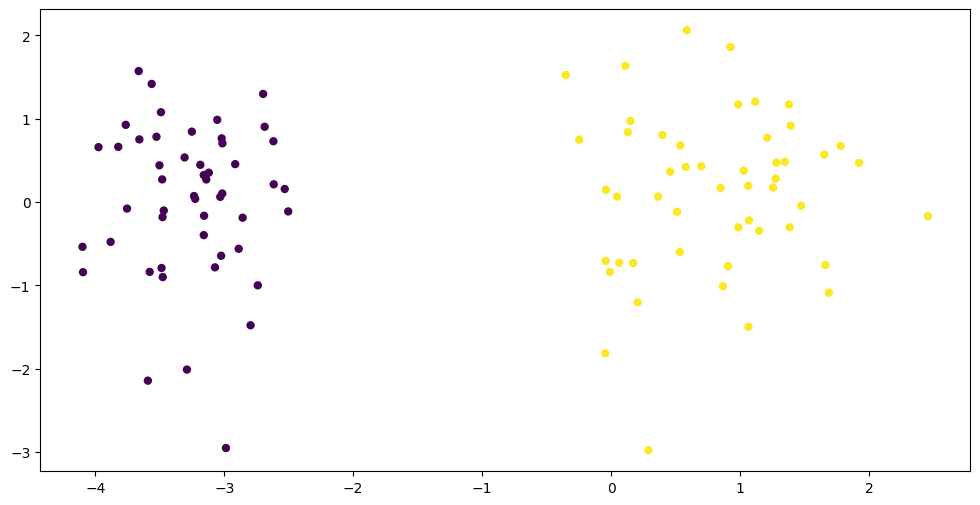

In [103]:
plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=25)
plt.show()

In [104]:
log_r = LogisticRegression(penalty=None ,solver='sag')

log_r.fit(X,y)

LogisticRegression(penalty=None, solver='sag')

In [105]:
print(log_r.coef_)
print(log_r.intercept_)

[[4.8281852  0.21552008]]
[5.80433538]


In [106]:
m1 = -(log_r.coef_[0][0]/log_r.coef_[0][1])
b1 = -(log_r.intercept_/log_r.coef_[0][1])

In [107]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

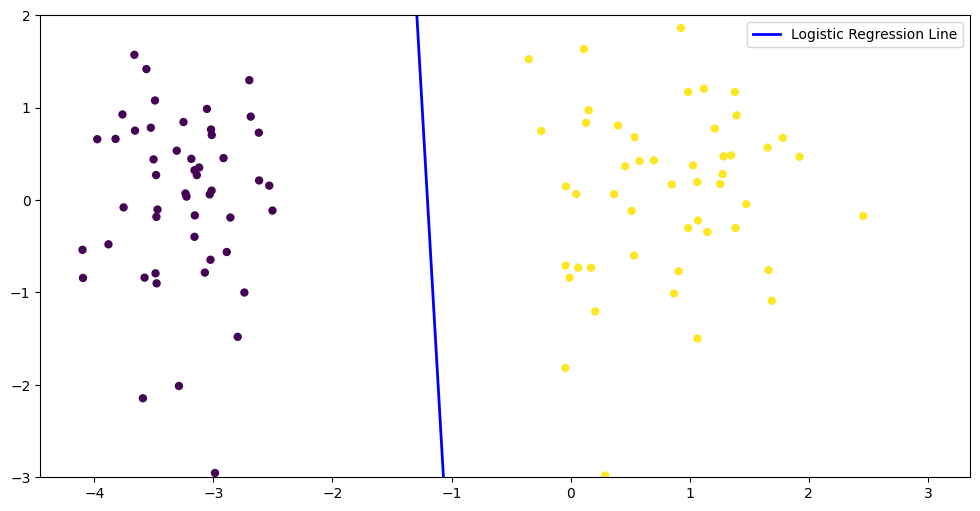

In [108]:
plt.figure(figsize=(12,6))
plt.plot(x_input,y_input,color='blue',linewidth=2, label='Logistic Regression Line')
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',s=25)
plt.legend()
plt.ylim(-3,2)
plt.show()

## Gradient Descent

In [109]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [110]:
def GradientDescent(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [111]:
coef_,intercept_ = GradientDescent(X,y)

In [112]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [113]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

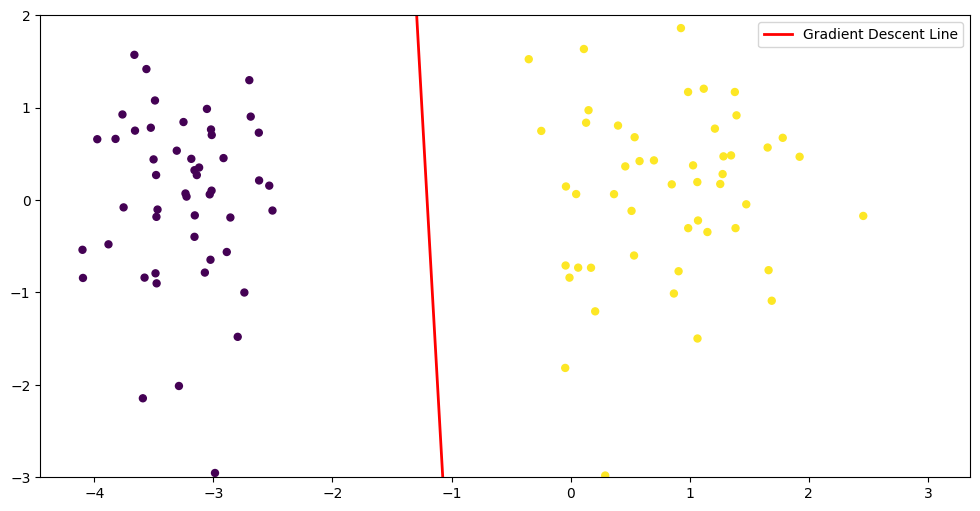

In [114]:
plt.figure(figsize=(12,6))
plt.plot(x_input1,y_input1,color='red',linewidth=2, label='Gradient Descent Line',)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',s=25)
plt.legend()
plt.ylim(-3,2)
plt.show()

**Drawing the both lines.**

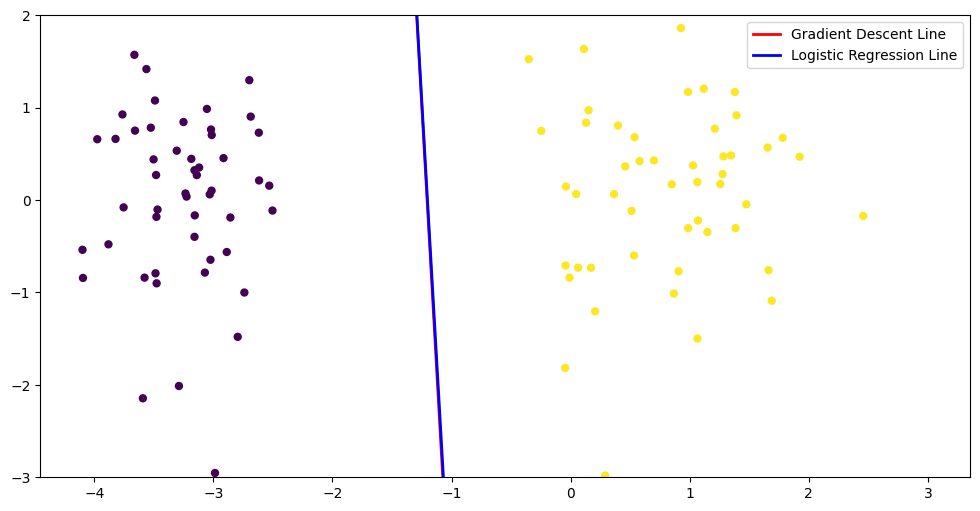

In [115]:
plt.figure(figsize=(12,6))
plt.plot(x_input1,y_input1,color='red',linewidth=2, label='Gradient Descent Line',)
plt.plot(x_input,y_input,color='blue',linewidth=2, label='Logistic Regression Line')
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',s=25)
plt.legend()
plt.ylim(-3,2)
plt.show()